# Problem Statement:


Assume you are a loan risk officer at a large bank and you are tasked with determining whether a two-wheeler loan application will be accepted or rejected based on the data shared by the loan applicant and some additional data extracted about them from 3rd party sources.

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
# import the XGBoost function for classification
from xgboost import XGBClassifier

# Import necessary libraries for random sample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("Assignment_Train.csv")

In [4]:
df.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


In [5]:
df.shape

(10000, 55)

In [6]:
list(df.columns)

['DEALER ID',
 'APPLICATION LOGIN DATE',
 'HDB BRANCH NAME',
 'HDB BRANCH STATE',
 'FIRST NAME',
 'MIDDLE NAME',
 'LAST NAME',
 'mobile',
 'AADHAR VERIFIED',
 'Cibil Score',
 'MOBILE VERIFICATION',
 'DEALER NAME',
 'TOTAL ASSET COST',
 'ASSET CTG',
 'ASSET MODEL NO',
 'APPLIED AMOUNT',
 'PRIMARY ASSET MAKE',
 'Primary Asset Model No',
 'Personal Email Address',
 'MARITAL STATUS',
 'GENDER',
 'DOB',
 'AGE',
 'ADDRESS TYPE',
 'EMPLOY CONSTITUTION',
 'EMPLOYER NAME',
 'EMPLOYER TYPE',
 'Pan Name',
 'name',
 'vpa',
 'upi_name',
 'Phone Social Premium.a23games',
 'Phone Social Premium.amazon',
 'Phone Social Premium.byjus',
 'Phone Social Premium.flipkart',
 'Phone Social Premium.housing',
 'Phone Social Premium.indiamart',
 'Phone Social Premium.instagram',
 'Phone Social Premium.isWABusiness',
 'Phone Social Premium.jeevansaathi',
 'Phone Social Premium.jiomart',
 'Phone Social Premium.microsoft',
 'Phone Social Premium.my11',
 'Phone Social Premium.paytm',
 'Phone Social Premium.rummycir

## Taking only necessary columns


In [7]:
# Show all rows
pd.set_option('display.max_rows', None)

# Show all columns
pd.set_option('display.max_columns', None)

In [8]:
sample_df = df[['AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'TOTAL ASSET COST', 'ASSET CTG', 
    'ASSET MODEL NO', 'APPLIED AMOUNT', 'PRIMARY ASSET MAKE', 'Primary Asset Model No', 'Pan Name',
    'vpa', 'upi_name', 'EMPLOY CONSTITUTION', 'EMPLOYER TYPE', 'name', 'phone_nameMatchScore', 'phone_phoneFootprintStrengthOverall', 'Application Status']]

In [9]:
sample_df.head()

,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Pan Name,vpa,upi_name,EMPLOY CONSTITUTION,EMPLOYER TYPE,name,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,NO,726,True,95041.0,MCEXA,139542,85000,HONDA MOTORS,SHINE DRUM BSVI,SUNIL KUMAR,ABFSPAY,SUNIL KUMAR,SALARIED,SALARIED,SUNIL CHANDER,67.222222,High,APPROVED
1,NO,NaN,True,NaN,NaN,140208,90000,HERO MOTORS,SPLENDOR PLUS SELF DRUM BSVI I3S,AMRIT KUMAR,OKSBI,Amrit Kumar,NaN,NaN,AMRIT KUMAR,100.000000,High,APPROVED
2,NO,737,True,119436.0,SCEXA,160001,75000,TVS MOTOR CO,TVS NTORQ SUPER SQUAD EDITION BSVI,ANIMESH THAPA,NaN,NaN,SELF-EMPLOYED,SELF-EMPLOYED,ANIMESH THAPA,-1.000000,Low,APPROVED
3,NO,713,True,87000.0,MCECA,160832,78500,HERO MOTORS,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI,ADITYA KUMAR,PAYTM,Aditya Kumar,SELF-EMPLOYED,SELF-EMPLOYED,ADITYA SINGH,72.777778,High,APPROVED
4,NO,669,True,NaN,NaN,174641,70000,HONDA MOTORS,DIO STD BSVI,HARESHBHAI AMRUTBHAI PARMAR,IKWIK,HARESHBHAI AMRUTBHAI,NaN,NaN,PARMAR HARESHBHAI AMRUTBHAI,68.095238,High,DECLINED


In [10]:
sample_df.shape

(10000, 18)

In [11]:
sample_df.drop(columns = ['ASSET MODEL NO', 'Primary Asset Model No', 'Pan Name', 'vpa', 
                          'upi_name', 'EMPLOY CONSTITUTION', 'name', 'ASSET CTG', 'PRIMARY ASSET MAKE'],
               axis = 1, inplace = True)

In [12]:
sample_df.shape

(10000, 9)

In [13]:
sample_df.head()

,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,APPLIED AMOUNT,EMPLOYER TYPE,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,NO,726,True,95041.0,85000,SALARIED,67.222222,High,APPROVED
1,NO,NaN,True,NaN,90000,NaN,100.000000,High,APPROVED
2,NO,737,True,119436.0,75000,SELF-EMPLOYED,-1.000000,Low,APPROVED
3,NO,713,True,87000.0,78500,SELF-EMPLOYED,72.777778,High,APPROVED
4,NO,669,True,NaN,70000,NaN,68.095238,High,DECLINED


In [14]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   AADHAR VERIFIED                      10000 non-null  object 
 1   Cibil Score                          5703 non-null   object 
 2   MOBILE VERIFICATION                  10000 non-null  bool   
 3   TOTAL ASSET COST                     4892 non-null   float64
 4   APPLIED AMOUNT                       10000 non-null  int64  
 5   EMPLOYER TYPE                        5002 non-null   object 
 6   phone_nameMatchScore                 9996 non-null   float64
 7   phone_phoneFootprintStrengthOverall  9994 non-null   object 
 8   Application Status                   10000 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 634.9+ KB


## Handling Missing values

In [15]:
sample_df.isnull().sum()

AADHAR VERIFIED                           0
Cibil Score                            4297
MOBILE VERIFICATION                       0
TOTAL ASSET COST                       5108
APPLIED AMOUNT                            0
EMPLOYER TYPE                          4998
phone_nameMatchScore                      4
phone_phoneFootprintStrengthOverall       6
Application Status                        0
dtype: int64

In [16]:
# Convert the column to numeric (non-numeric values will be turned into NaN)
sample_df['Cibil Score'] = pd.to_numeric(sample_df['Cibil Score'], errors='coerce')
print("Meadian value for Cibil Score:",sample_df['Cibil Score'].median())
print("Mean value for Cibil Score:",sample_df['Cibil Score'].mean())
sample_df['Cibil Score'].describe()

Meadian value for Cibil Score: 725.0
Mean value for Cibil Score: 706.4021182700794


count    5665.000000
mean      706.402118
std        61.452289
min       521.000000
25%       668.000000
50%       725.000000
75%       752.000000
max       826.000000
Name: Cibil Score, dtype: float64

## Checking Distribution of Data and handle missing values effectly

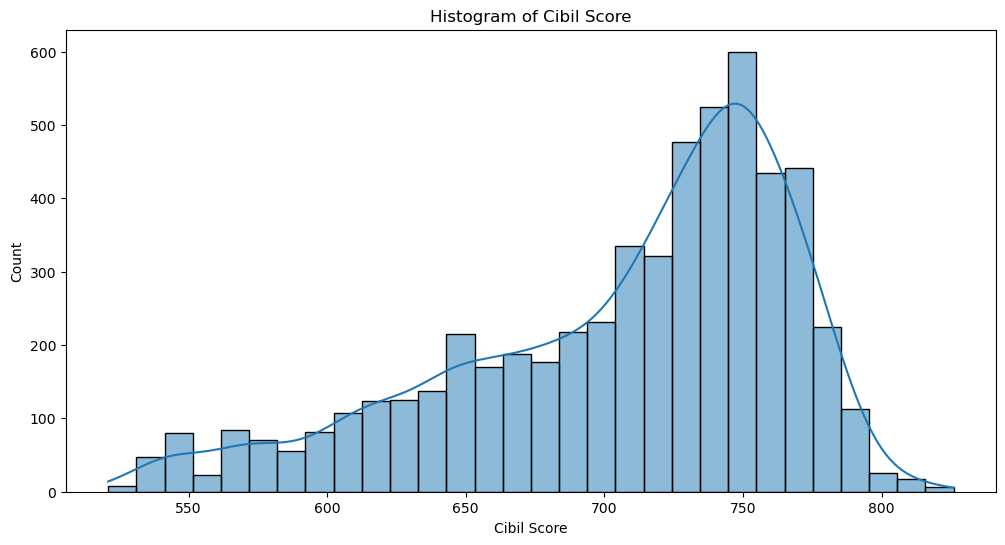

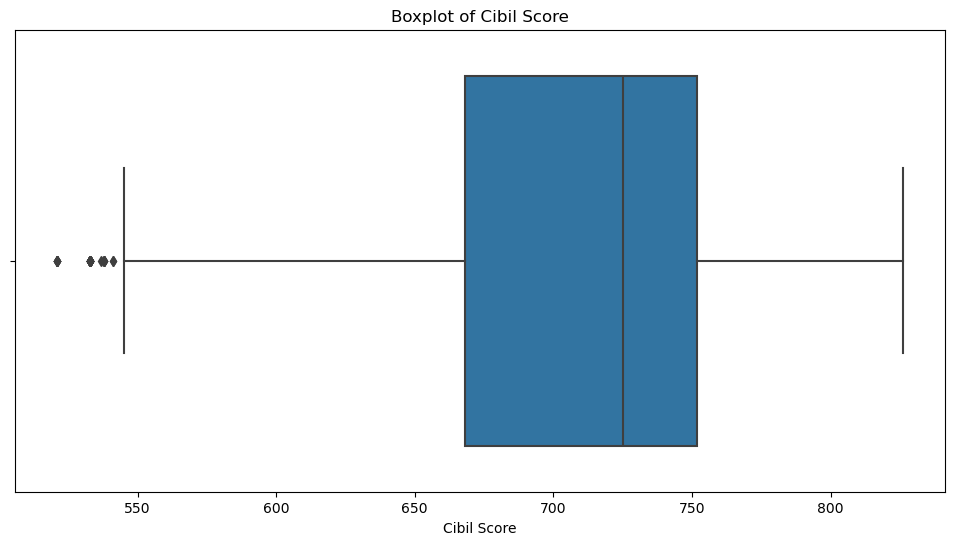

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(sample_df['Cibil Score'].dropna(), bins=30, kde=True)
plt.title('Histogram of Cibil Score')
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=sample_df['Cibil Score'].dropna())
plt.title('Boxplot of Cibil Score')
plt.show()


I opted for the 25th percentile over the median because, with a higher amount of missing values, the 25th percentile manages outliers and missing values more effectively. It is less influenced by extreme values compared to the median. The distribution is better preserved, as illustrated in the plot below.

In [18]:
# # Calculate the median
# median_value = sample_df['Cibil Score'].median()

# # Fill missing values with the median
# sample_df['Cibil Score'].fillna(median_value, inplace=True)


# Calculate the 25th percentile
percentile_25 = sample_df['Cibil Score'].quantile(0.25)

# Fill missing values with the 25th percentile
sample_df['Cibil Score'].fillna(percentile_25, inplace=True)

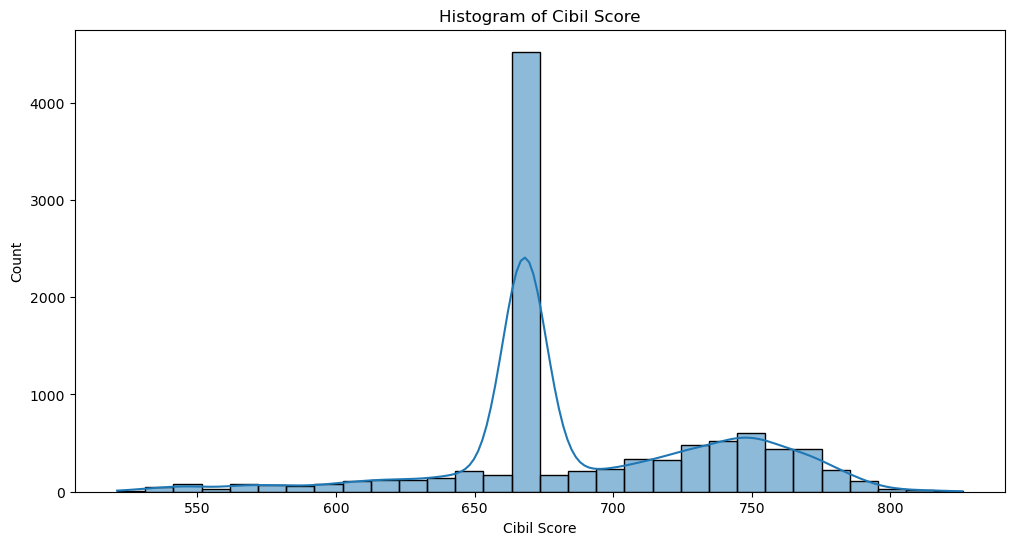

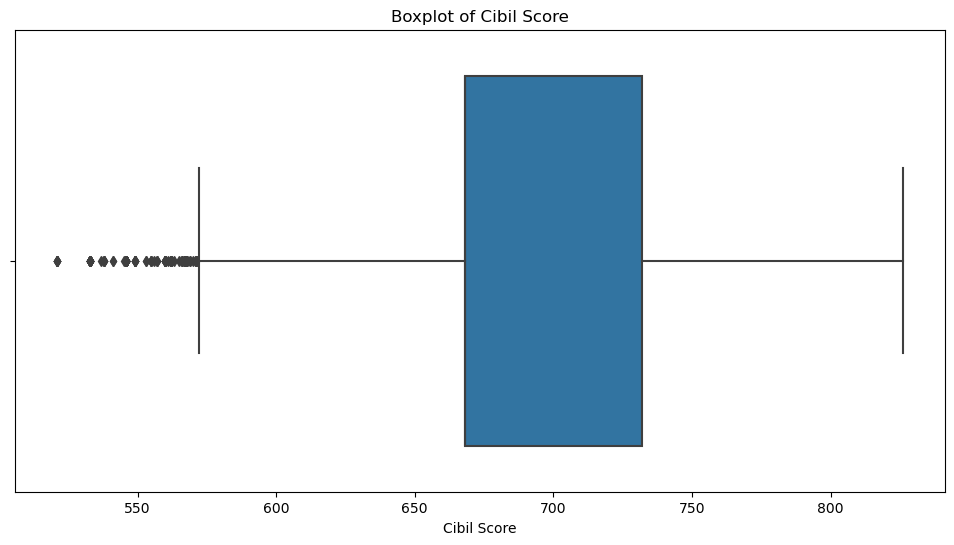

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(sample_df['Cibil Score'].dropna(), bins=30, kde=True)
plt.title('Histogram of Cibil Score')
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=sample_df['Cibil Score'].dropna())
plt.title('Boxplot of Cibil Score')
plt.show()


In [20]:
# Convert the column to numeric (non-numeric values will be turned into NaN)
sample_df['phone_nameMatchScore'] = pd.to_numeric(sample_df['phone_nameMatchScore'], errors='coerce')
sample_df['phone_nameMatchScore'].describe()

count    9996.000000
mean       55.645558
std        42.100616
min        -1.000000
25%        -1.000000
50%        73.571429
75%        96.000000
max       100.000000
Name: phone_nameMatchScore, dtype: float64

In [21]:
# Fill missing values with the mean
sample_df['phone_nameMatchScore'].fillna(sample_df['phone_nameMatchScore'].mean(), inplace=True)

In [22]:
sample_df['phone_phoneFootprintStrengthOverall'].value_counts()

phone_phoneFootprintStrengthOverall
Medium       4599
High         4141
Low          1179
Very High      44
Very Low       31
Name: count, dtype: int64

In [23]:
# Fill missing values 
sample_df['phone_phoneFootprintStrengthOverall'].fillna('Medium', inplace=True)

In [24]:
# Convert the column to numeric (non-numeric values will be turned into NaN)
sample_df['TOTAL ASSET COST'] = pd.to_numeric(sample_df['TOTAL ASSET COST'], errors = 'coerce')

In [25]:
sample_df['TOTAL ASSET COST'].describe()

count      4892.000000
mean      97612.518397
std       16745.027041
min       51873.000000
25%       88425.500000
50%       94400.000000
75%      103499.250000
max      241116.000000
Name: TOTAL ASSET COST, dtype: float64

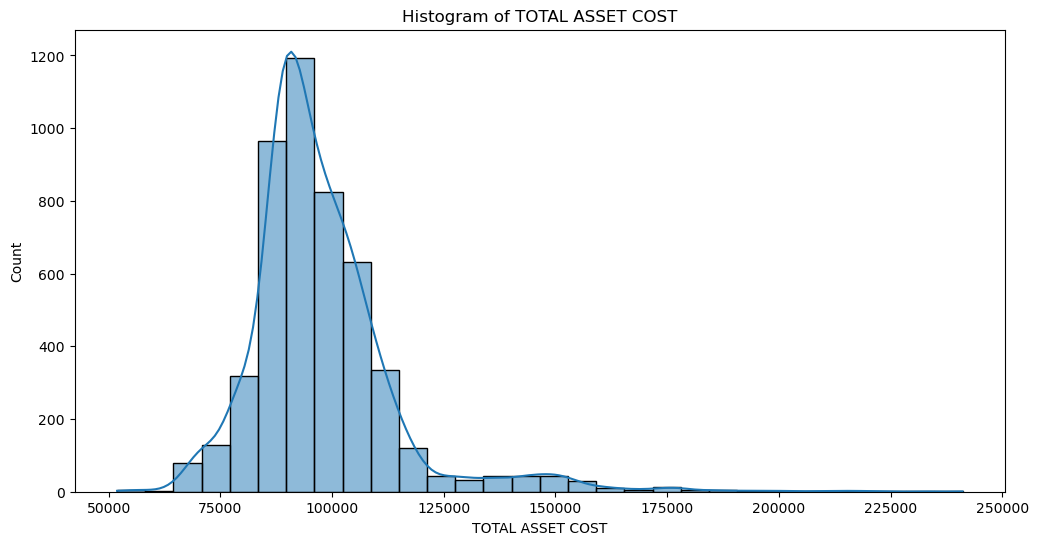

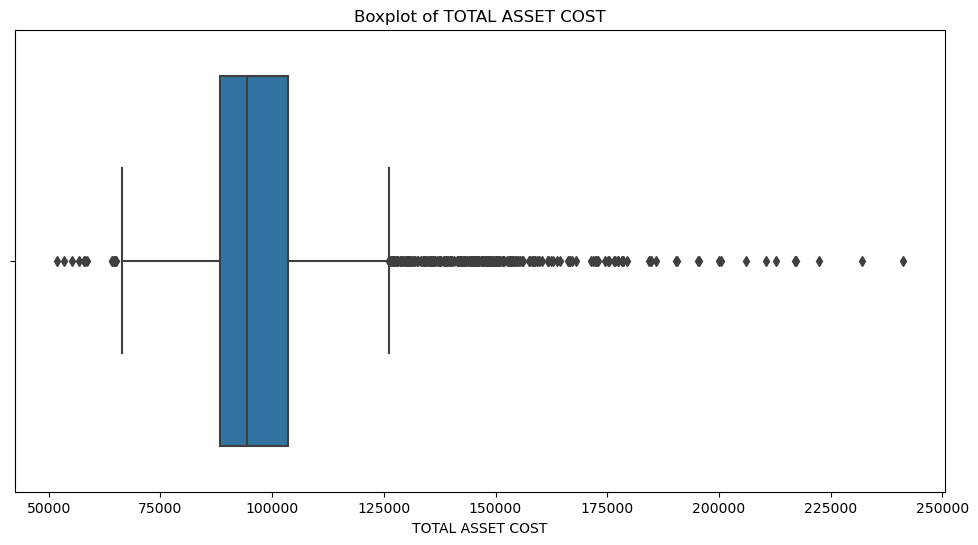

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(sample_df['TOTAL ASSET COST'].dropna(), bins=30, kde=True)
plt.title('Histogram of TOTAL ASSET COST')
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=sample_df['TOTAL ASSET COST'].dropna())
plt.title('Boxplot of TOTAL ASSET COST')
plt.show()


In [27]:
# # Calculate the median
# mean_value = sample_df['TOTAL ASSET COST'].mean()

# # Fill missing values with the median
# sample_df['TOTAL ASSET COST'].fillna(mean_value, inplace=True)

# Calculate the 25th percentile
percentile_25 = sample_df['TOTAL ASSET COST'].quantile(0.25)

# Fill missing values with the 25th percentile
sample_df['TOTAL ASSET COST'].fillna(percentile_25, inplace=True)

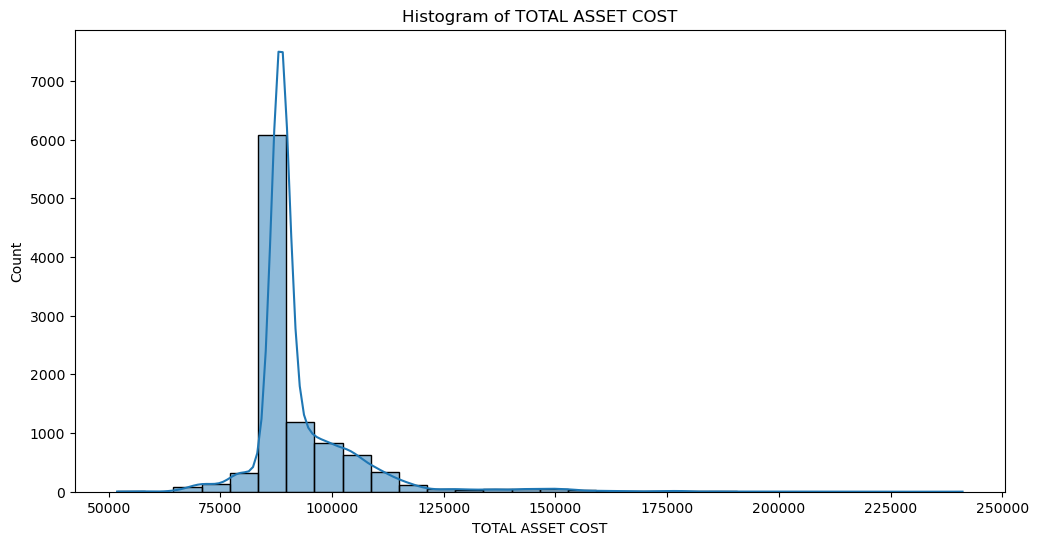

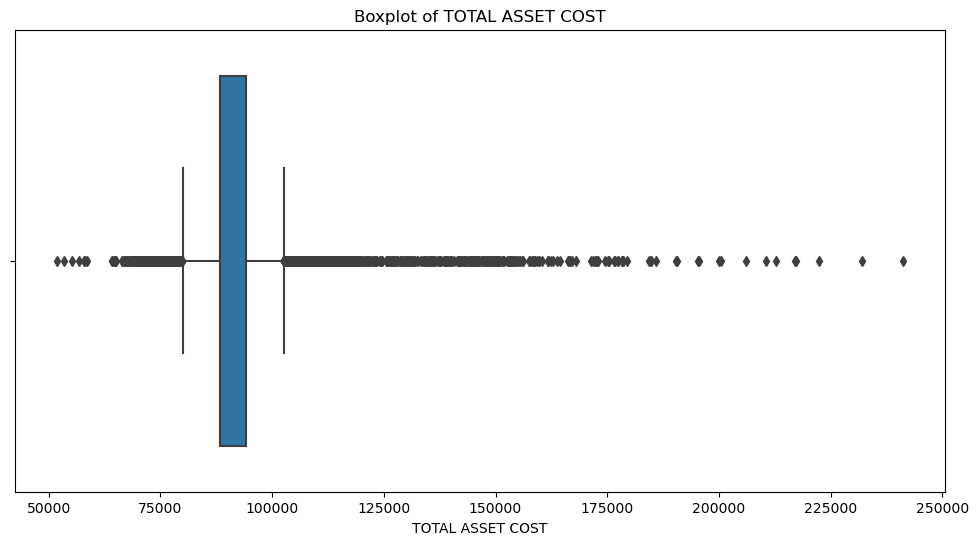

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(sample_df['TOTAL ASSET COST'].dropna(), bins=30, kde=True)
plt.title('Histogram of TOTAL ASSET COST')
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=sample_df['TOTAL ASSET COST'].dropna())
plt.title('Boxplot of TOTAL ASSET COST')
plt.show()


In [29]:
sample_df['EMPLOYER TYPE'].value_counts()

EMPLOYER TYPE
SELF-EMPLOYED     3473
SALARIED          1354
Non-Government     152
Government          23
Name: count, dtype: int64

In [30]:
sample_df['EMPLOYER TYPE'].fillna('Unknown', inplace = True)

In [31]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   AADHAR VERIFIED                      10000 non-null  object 
 1   Cibil Score                          10000 non-null  float64
 2   MOBILE VERIFICATION                  10000 non-null  bool   
 3   TOTAL ASSET COST                     10000 non-null  float64
 4   APPLIED AMOUNT                       10000 non-null  int64  
 5   EMPLOYER TYPE                        10000 non-null  object 
 6   phone_nameMatchScore                 10000 non-null  float64
 7   phone_phoneFootprintStrengthOverall  10000 non-null  object 
 8   Application Status                   10000 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 634.9+ KB


## Seperating Numerical and Categorical columns

In [32]:
df_num = sample_df.select_dtypes(include = [np.number])
print(df_num.columns)
df_num.shape

Index(['Cibil Score', 'TOTAL ASSET COST', 'APPLIED AMOUNT',
       'phone_nameMatchScore'],
      dtype='object')


(10000, 4)

In [33]:
sample_df['MOBILE VERIFICATION'] = sample_df['MOBILE VERIFICATION'].astype('object')
df_cat = sample_df.select_dtypes(include = 'object')
print(df_cat.columns)
df_cat.shape

Index(['AADHAR VERIFIED', 'MOBILE VERIFICATION', 'EMPLOYER TYPE',
       'phone_phoneFootprintStrengthOverall', 'Application Status'],
      dtype='object')


(10000, 5)

In [34]:
print(sample_df.columns)
sample_df.shape

Index(['AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION',
       'TOTAL ASSET COST', 'APPLIED AMOUNT', 'EMPLOYER TYPE',
       'phone_nameMatchScore', 'phone_phoneFootprintStrengthOverall',
       'Application Status'],
      dtype='object')


(10000, 9)

## Handling Outliers

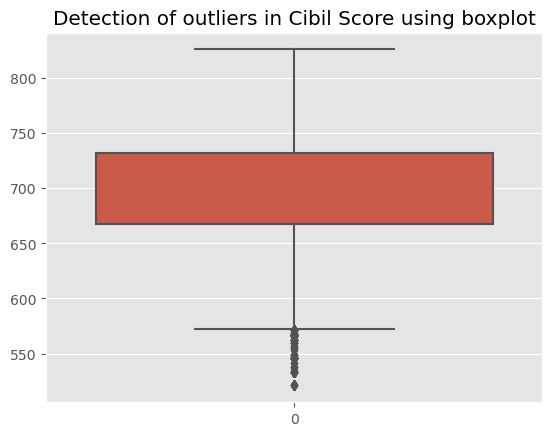

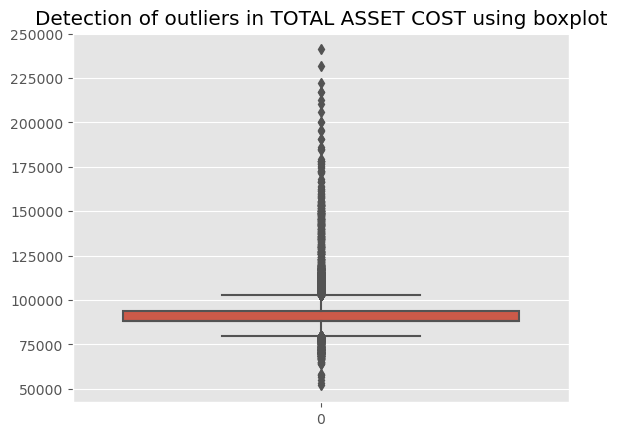

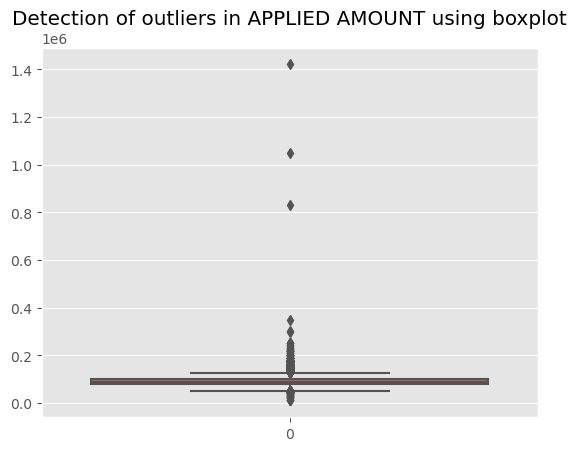

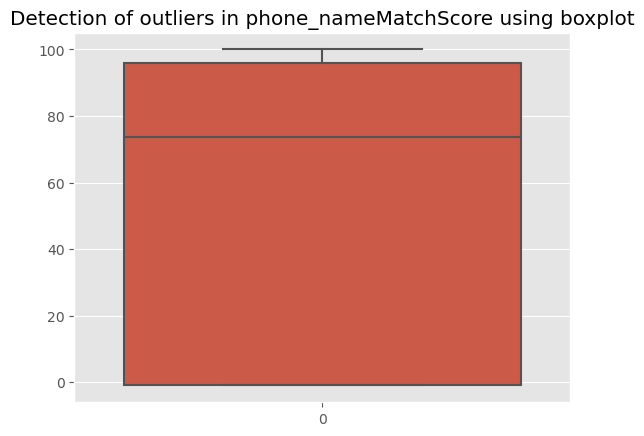

In [35]:
# now let's detect outliers in the numerical columns
num_col = list(df_num.columns)
for col in num_col:
    plt.style.use("ggplot")
    sns.boxplot(df_num[col])
    plt.title("Detection of outliers in {} using boxplot".format(col))
    plt.show()

## Handling Outliers with  different methods

I experimented with various outlier handling methods, including logarithmic transformation, square root transformation, and capping. Given the high amount of outliers in this dataset, I found that capping handles them most effectively compared to the other methods.

In [36]:
def handle_outliers(series, method):
    if method == 'cap' :
    # calculating lowwer and upper bound
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        multiplier = 1.5
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
    
    # treat outlier by using caping
        series = series.apply(lambda x : lower_bound if x < lower_bound else x)
        series = series.apply(lambda x : upper_bound if x > upper_bound else x)
    
    elif method == 'log' :
        series = np.log1p(series)
    elif method == 'sqrt' :
        series = np.sqrt(series)
        
    return series

df_num['Cibil Score'] = handle_outliers(df_num['Cibil Score'], method = 'cap')
df_num['TOTAL ASSET COST'] = handle_outliers(df_num['TOTAL ASSET COST'], method = 'cap')
df_num['APPLIED AMOUNT'] = handle_outliers(df_num['APPLIED AMOUNT'], method = 'cap')

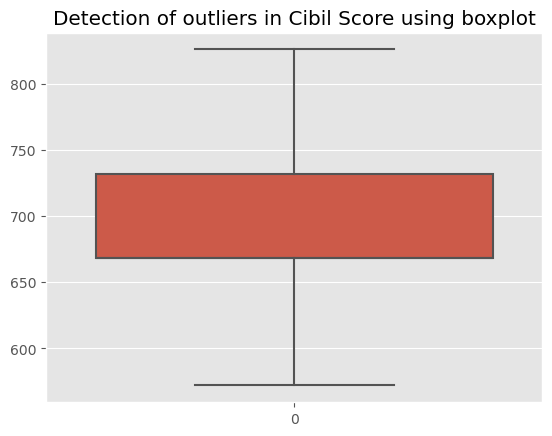

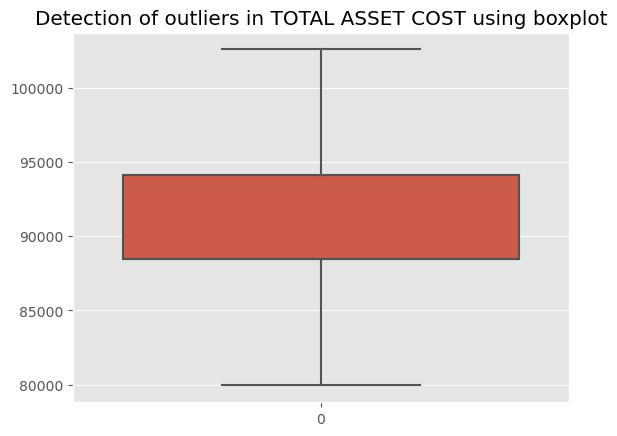

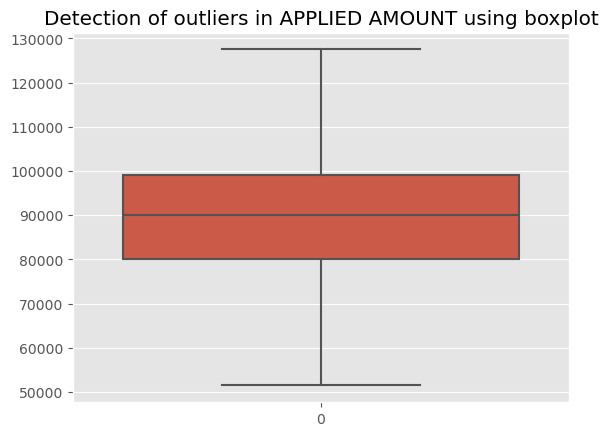

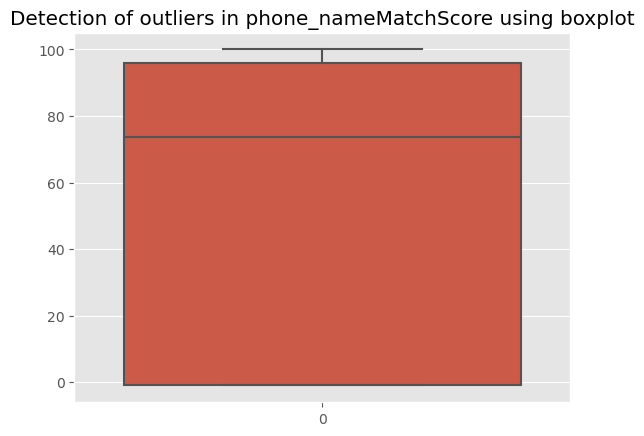

In [37]:
# now let's detect outliers in the numerical columns
num_col = list(df_num.columns)
for col in num_col:
    plt.style.use("ggplot")
    sns.boxplot(df_num[col])
    plt.title("Detection of outliers in {} using boxplot".format(col))
    plt.show()

## Handling Categorical variables

I used one-hot encoding with pd.get_dummies to convert categorical variables into numerical format. This approach was applied to transform categorical features into a binary matrix, enabling the dataset to be used effectively in machine learning algorithms.

In [38]:
target = df_cat['Application Status']
target = pd.get_dummies(data = target, prefix = 'Application Status', prefix_sep='_',
               columns = ['Application Status'],
               dtype='int8')
df_cat.drop(columns = ['Application Status'], axis = 1, inplace = True)

In [39]:
df_cat.shape

(10000, 4)

In [40]:
categorical_columns =  list(df_cat.columns)
dummy_var = pd.get_dummies(data = df_cat, prefix = None, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [41]:
target.head()

,Application Status_APPROVED,Application Status_DECLINED
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [42]:
target.drop(columns = 'Application Status_DECLINED', axis = 1, inplace = True)

In [43]:
target.head()

,Application Status_APPROVED
0,1
1,1
2,1
3,1
4,0


## Scaling Numerical columns

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger impact than others.

In [44]:
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numeric variables
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [45]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()

,Cibil Score,TOTAL ASSET COST,APPLIED AMOUNT,phone_nameMatchScore,EMPLOYER TYPE_Non-Government,EMPLOYER TYPE_SALARIED,EMPLOYER TYPE_SELF-EMPLOYED,EMPLOYER TYPE_Unknown,phone_phoneFootprintStrengthOverall_Low,phone_phoneFootprintStrengthOverall_Medium,phone_phoneFootprintStrengthOverall_Very High,phone_phoneFootprintStrengthOverall_Very Low
0,0.734694,0.642930,-0.348673,0.275045,0,1,0,0,0,0,0,0
1,-0.457688,-0.465579,-0.017169,1.053798,0,0,0,1,0,0,0,0
2,0.960836,1.903020,-1.011679,-1.345817,0,0,1,0,1,0,0,0
3,0.467436,-0.704439,-0.779627,0.407037,0,0,1,0,0,0,0,0
4,-0.437129,-0.465579,-1.343183,0.295786,0,0,0,1,0,0,0,0


## Seperating Dependent and Independent Features

In [46]:
y = target

In [47]:
X.shape

(10000, 12)

In [48]:
y.shape

(10000, 1)

## Train-Test Split

In [49]:
# import train-test split 
from sklearn.model_selection import train_test_split

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (8000, 12)
y_train (8000, 1)
X_test (2000, 12)
y_test (2000, 1)


## Checking whether our Dataset is Balanced or Imbalanced

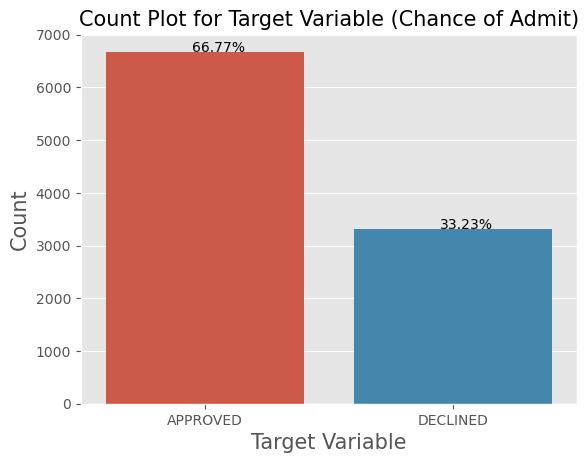

In [50]:
# import 'Seaborn' 
import seaborn as sns

# consider only the target variable
df_target = sample_df['Application Status'].copy()

# get counts of 0's and 1's in the 'Chance of Admit' variable
df_target.value_counts()

# plot the countplot of the variable 'Chance of Admit'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (Chance of Admit)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

The dataset is imbalanced, with the 'APPROVED' class representing 67% of the data and the 'DECLINED' class constituting 33%. To address this imbalance, I employed a smoothing technique of oversampling. This approach involves generating additional synthetic samples for the minority class ('DECLINED') to balance the class distribution. By doing so, we ensure that the model is trained on a more balanced dataset, which helps improve its performance and generalization across both classes.

In [51]:
# import train-test split 
from sklearn.model_selection import train_test_split

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

# Check the original class distribution in the training set
print('Original class distribution in y_train:', Counter(y_train))

# Initialize the SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=21)

# Apply SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the resampled class distribution
print('Resampled class distribution in y_train_resampled:', Counter(y_train_resampled))

# Check dimensions of the resampled data
print('X_train_resampled', X_train_resampled.shape)
print('y_train_resampled', y_train_resampled.shape)

X_train (8000, 12)
y_train (8000, 1)
X_test (2000, 12)
y_test (2000, 1)
Original class distribution in y_train: Counter({'Application Status_APPROVED': 1})
Resampled class distribution in y_train_resampled: Counter({'Application Status_APPROVED': 1})
X_train_resampled (10628, 12)
y_train_resampled (10628, 1)


In [52]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train_resampled)

    # return the performace measures on train set
    return(classification_report(y_train_resampled, train_pred))

In [53]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return((classification_report(y_test, test_pred)))

In [54]:
def get_confusion_matrix(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, test_pred)


    # return the performace measures on test set
    return cm

## Logistic regression

In [55]:
logreg_model = LogisticRegression()
logestic_model = logreg_model.fit(X_train_resampled,y_train_resampled)

# Make predictions on the test set
y_test_pred = logestic_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 594   43]
 [ 273 1090]]


In [56]:
train_report = get_train_report(logestic_model)

print('Train Report:\n', train_report)

Train Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      5314
           1       0.94      0.80      0.86      5314

    accuracy                           0.87     10628
   macro avg       0.88      0.87      0.87     10628
weighted avg       0.88      0.87      0.87     10628



In [57]:
test_report  = get_test_report(logestic_model)
print('Test Report:\n', test_report)

Test Report:
               precision    recall  f1-score   support

           0       0.69      0.93      0.79       637
           1       0.96      0.80      0.87      1363

    accuracy                           0.84      2000
   macro avg       0.82      0.87      0.83      2000
weighted avg       0.87      0.84      0.85      2000



#### Here are the observations based on your logistic regression model:

1. The model performs better in identifying 'APPROVED' (Class 1) than 'DECLINED' (Class 0) in both training and test sets.
2. Recall for 'DECLINED' is high, indicating good detection of the minority class, but precision is lower, especially in the test set.
3. Precision for 'DECLINED' drops from 0.82 in training to 0.69 in testing, suggesting reduced effectiveness on unseen data.
4. The model's accuracy is slightly lower on the test set (0.84) compared to the training set (0.87), indicating some overfitting.
5. The F1-score for 'APPROVED' is higher in both sets, reflecting better balance between precision and recall for the majority class.

## Random forest classifier

In [58]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train_resampled, y_train_resampled)

# Predicting the target variable for the test set
y_test_pred = rf_model.predict(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 540   97]
 [ 202 1161]]


In [59]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the random forest model to the function
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report) 


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5314
           1       0.99      0.95      0.97      5314

    accuracy                           0.97     10628
   macro avg       0.97      0.97      0.97     10628
weighted avg       0.97      0.97      0.97     10628



In [60]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the random forest model to the function
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.73      0.85      0.78       637
           1       0.92      0.85      0.89      1363

    accuracy                           0.85      2000
   macro avg       0.83      0.85      0.83      2000
weighted avg       0.86      0.85      0.85      2000



#### Here are the observations for the Random Forest classifier:

1. The model performs well in identifying 'APPROVED' (Class 1) with high precision and recall in both training and test sets.
2. The recall for 'DECLINED' (Class 0) is lower in the test set (0.85) compared to the training set (0.99), indicating reduced performance on unseen data.
3. Precision for 'DECLINED' drops from 0.96 in training to 0.73 in testing, suggesting challenges in classifying the minority class effectively on the test set.
4. The accuracy of the model is slightly lower on the test set (0.85) compared to the training set (0.97), which could indicate some overfitting.
5. The F1-score for 'APPROVED' is high in both sets, showing a good balance between precision and recall for the majority class.

## Decision tree Classifier

In [61]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train_resampled, y_train_resampled)

# Predicting the target variable for the test set
y_test_pred = decision_tree.predict(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 530  107]
 [ 199 1164]]


In [62]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
train_report = get_train_report(decision_tree)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5314
           1       0.99      0.97      0.98      5314

    accuracy                           0.98     10628
   macro avg       0.98      0.98      0.98     10628
weighted avg       0.98      0.98      0.98     10628



In [63]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree to the function
test_report = get_test_report(decision_tree)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       637
           1       0.92      0.85      0.88      1363

    accuracy                           0.85      2000
   macro avg       0.82      0.84      0.83      2000
weighted avg       0.86      0.85      0.85      2000



#### Here are the observations for the Decision Tree classifier:

1. The model shows strong performance in both precision and recall for 'APPROVED' (Class 1) in training, with high values in both metrics.
2. The recall for 'DECLINED' (Class 0) is lower on the test set (0.83) compared to the training set (0.99), indicating a decrease in performance on new data.
3. Precision for 'DECLINED' falls from 0.97 in training to 0.73 in testing, suggesting a drop in the model’s ability to classify the minority class accurately.
4. The accuracy on the test set is 0.85, which is lower than the training accuracy of 0.98, indicating potential overfitting.
5. The F1-score for 'APPROVED' remains high across both sets, reflecting a consistent balance between precision and recall for the majority class.

## Hyper parameter tuning for Decision Tree Classifier using RandomizedSearchCV

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=10)

# Define the hyperparameter grid for tuning
param_grid_dt = {
    'criterion': ['gini', 'entropy'],       # Splitting criteria
    'max_depth': [5, 10, 20, None],         # Max depth of the tree
    'min_samples_split': [2, 10, 20],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 5, 10],         # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Initialize RandomizedSearchCV for Decision Tree
random_search_dt = RandomizedSearchCV(decision_tree, param_grid_dt, 
                                      n_iter=10, scoring='accuracy', 
                                      cv=3, random_state=10, verbose=1, n_jobs=-1)

# Fit the RandomizedSearchCV on the training data
random_search_dt.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters for Decision Tree
print("Best hyperparameters for Decision Tree:", random_search_dt.best_params_)
print("Best Decision Tree score:", random_search_dt.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters for Decision Tree: {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': 10, 'criterion': 'gini'}
Best Decision Tree score: 0.8785294846849167


## Hyper parameter tuning for RandomForest Classifier using RandomizedSearchCV

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
random_forest = RandomForestClassifier(random_state=10)

# Define the hyperparameter grid for tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],                # Number of trees in the forest
    'criterion': ['gini', 'entropy'],              # Splitting criteria
    'max_depth': [10, 20, 30, None],               # Max depth of the trees
    'min_samples_split': [2, 10, 20],              # Minimum samples required to split a node
    'min_samples_leaf': [1, 5, 10],                # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']       # Number of features considered for the best split
}

# Initialize RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(random_forest, param_grid_rf, 
                                      n_iter=10, scoring='accuracy', 
                                      cv=3, random_state=10, verbose=1, n_jobs=-1)

# Fit the RandomizedSearchCV on the training data
random_search_rf.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters for Random Forest
print("Best hyperparameters for Random Forest:", random_search_rf.best_params_)
print("Best Random Forest score:", random_search_rf.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/krishna/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/krishna/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/krishna/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/krishna/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: Dat

/home/krishna/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/krishna/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/krishna/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/krishna/anaconda3/lib/python3.1

Best hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'}
Best Random Forest score: 0.8916090127480621


## Fiting Best Parameters in Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Instantiate the 'DecisionTreeClassifier' object using the best hyperparameters
decision_tree_classification = DecisionTreeClassifier(
    criterion='gini',                   # Use 'gini' as per the best parameters found
    max_depth=10,                       # Best parameter
    min_samples_split=20,               # Best parameter
    min_samples_leaf=10,                # Best parameter
    max_features=None,                  # Best parameter
    random_state=10                     # Ensure reproducibility
)

# Fit the model using the fit() on the resampled training data
decision_tree = decision_tree_classification.fit(X_train_resampled, y_train_resampled)

# Predicting the target variable for the test set
y_test_pred = decision_tree.predict(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred)

# Printing the confusion matrix and accuracy
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

train_report = get_train_report(decision_tree)

print('Train Report:\n', train_report)

test_report  = get_test_report(decision_tree)
print('Test Report:\n', test_report)


Confusion Matrix:
[[ 581   56]
 [ 232 1131]]

Accuracy: 0.856
Train Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      5314
           1       0.95      0.85      0.90      5314

    accuracy                           0.90     10628
   macro avg       0.91      0.90      0.90     10628
weighted avg       0.91      0.90      0.90     10628

Test Report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80       637
           1       0.95      0.83      0.89      1363

    accuracy                           0.86      2000
   macro avg       0.83      0.87      0.84      2000
weighted avg       0.88      0.86      0.86      2000



#### Here are the observations for the Decision Tree classifier after hyperparameter tuning:

1. The model exhibits strong performance in precision and recall for 'APPROVED' (Class 1) during training, with high values in both metrics.
2. Recall for 'DECLINED' (Class 0) drops from 0.99 in training to 0.83 in the test set, indicating reduced performance on unseen data.
3. Precision for 'DECLINED' decreases from 0.97 in training to 0.71 in testing, suggesting diminished accuracy in identifying the minority class.
4. The test set accuracy of 0.86 is lower than the training accuracy of 0.90, suggesting potential overfitting.
5. The F1-score for 'APPROVED' remains high across both training and test sets, indicating a consistent balance between precision and recall for the majority class.

## Fiting Best Parameters in Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Instantiate the 'RandomForestClassifier' object using the best hyperparameters
rf_classification = RandomForestClassifier(
    n_estimators=100,            # Number of trees in the forest
    max_depth=20,                # Maximum depth of the tree
    min_samples_split=2,         # Minimum number of samples required to split an internal node
    min_samples_leaf=1,          # Minimum number of samples required at a leaf node
    max_features='sqrt',         # Number of features to consider when looking for the best split
    criterion='entropy',         # Criterion for measuring the quality of a split
    random_state=10              # Ensure reproducibility
)

# Fit the model using the fit() on the resampled training data
rf_model = rf_classification.fit(X_train_resampled, y_train_resampled)

# Predicting the target variable for the test set
y_test_pred = rf_model.predict(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred)

# Printing the confusion matrix and accuracy
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

train_report = get_train_report(rf_model)

print('Train Report:\n', train_report)

test_report  = get_test_report(rf_model)
print('Test Report:\n', test_report)



Confusion Matrix:
[[ 550   87]
 [ 195 1168]]

Accuracy: 0.859
Train Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      5314
           1       0.99      0.95      0.97      5314

    accuracy                           0.97     10628
   macro avg       0.97      0.97      0.97     10628
weighted avg       0.97      0.97      0.97     10628

Test Report:
               precision    recall  f1-score   support

           0       0.74      0.86      0.80       637
           1       0.93      0.86      0.89      1363

    accuracy                           0.86      2000
   macro avg       0.83      0.86      0.84      2000
weighted avg       0.87      0.86      0.86      2000



#### Here are the observations for the Random Forest Classifier after hyperparameter tuning:

1. High Performance on Training Data: The model exhibits excellent precision and recall for both 'APPROVED' and 'DECLINED' during training, with an accuracy of 0.97, suggesting strong performance on the resampled training set.

2. Slight Decline in Recall for 'DECLINED': The recall for 'DECLINED' (Class 0) drops from 0.99 in training to 0.86 on the test set, indicating a decrease in performance when predicting minority class instances on unseen data.

3. Precision for 'DECLINED': Precision for 'DECLINED' falls from 0.95 in training to 0.74 in testing, meaning the model struggles a bit more with false positives on the test set.

4. Balanced Performance on 'APPROVED': The precision and recall for 'APPROVED' (Class 1) remain high in both training (0.99) and testing (0.93), showing consistent performance for the majority class.

5. Good Generalization: The test set accuracy of 0.86 is close to the training accuracy of 0.97, suggesting the model generalizes well with minimal overfitting, making it the best model among those tested.

## Hyper parameter tuning for GradientBoost Classifier using GridSearchCV

In [68]:
'''
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Initialize GradientBoostingClassifier
gbm_classification = GradientBoostingClassifier(random_state=10)

# Define the hyperparameter grid for tuning
param_grid_gbm = {
    'n_estimators': [100, 200, 300],                # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],             # Step size shrinks to prevent overfitting
    'max_depth': [3, 5, 7, 10],                    # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],               # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],                 # Minimum number of samples required at a leaf node
    'subsample': [0.8, 0.9, 1.0]                  # Proportion of samples used for fitting the trees
}

# Initialize GridSearchCV for Gradient Boosting
grid_search_gbm = GridSearchCV(
    GradientBoostingClassifier(random_state=10),
    param_grid_gbm,
    scoring='accuracy',
    cv=3,                           # Number of cross-validation folds
    verbose=1,                      # Verbosity level
    n_jobs=-1                       # Use all available cores
)

# Fit the GridSearchCV
grid_search_gbm.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and score
print("Best hyperparameters for Gradient Boosting:", grid_search_gbm.best_params_)
print("Best Gradient Boosting score:", grid_search_gbm.best_score_)
'''

'\nfrom sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.model_selection import GridSearchCV\n\n# Initialize GradientBoostingClassifier\ngbm_classification = GradientBoostingClassifier(random_state=10)\n\n# Define the hyperparameter grid for tuning\nparam_grid_gbm = {\n    \'n_estimators\': [100, 200, 300],                # Number of boosting stages to be run\n    \'learning_rate\': [0.01, 0.1, 0.2],             # Step size shrinks to prevent overfitting\n    \'max_depth\': [3, 5, 7, 10],                    # Maximum depth of the individual trees\n    \'min_samples_split\': [2, 5, 10],               # Minimum number of samples required to split an internal node\n    \'min_samples_leaf\': [1, 2, 5],                 # Minimum number of samples required at a leaf node\n    \'subsample\': [0.8, 0.9, 1.0]                  # Proportion of samples used for fitting the trees\n}\n\n# Initialize GridSearchCV for Gradient Boosting\ngrid_search_gbm = GridSearchCV(\n    GradientBoos

Best hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.9}
Best Gradient Boosting score: 0.8902921537387538

## Gradient Boosting Classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize GradientBoostingClassifier with the best hyperparameters
best_gb_model = GradientBoostingClassifier(
    learning_rate=0.1, 
    max_depth=10, 
    min_samples_leaf=5, 
    min_samples_split=2, 
    n_estimators=100, 
    subsample=0.9,
    random_state=10
)

# Fit the model on the resampled training data
best_gb_model.fit(X_train_resampled, y_train_resampled)

# Predict the target variable for the test set
y_test_pred = best_gb_model.predict(X_test)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print the classification report
classification_rep = classification_report(y_test, y_test_pred)
print("\nClassification Report:")
print(classification_rep)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_test_pred)
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[ 543   94]
 [ 192 1171]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       637
           1       0.93      0.86      0.89      1363

    accuracy                           0.86      2000
   macro avg       0.83      0.86      0.84      2000
weighted avg       0.87      0.86      0.86      2000


Accuracy: 0.857


## Conclusion:

##### After analyzing Logistic Regression, Decision Tree, RandomForest, and Gradient Boosting models, the RandomForest Classifier showed the best performance. It achieved a strong balance between precision, recall, and F1-score, particularly in handling imbalanced data. While Logistic Regression and Decision Tree models struggled with minority class recall and showed signs of overfitting, RandomForest outperformed them by generalizing well across both training and test sets. Thus, RandomForest was selected as the best model for this task.

## Saving the Model

In [70]:
import joblib

# Save the trained model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

# Unseen Test data


In [71]:
# Step 1: Load the unseen data
unseen_data = pd.read_csv('Assignment_Test.csv')
print(unseen_data.shape)
unseen_data.head()

(2000, 55)


,UID,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Personal Email Address,MARITAL STATUS,GENDER,DOB,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,Phone Social Premium.a23games,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.instagram,Phone Social Premium.isWABusiness,Phone Social Premium.jeevansaathi,Phone Social Premium.jiomart,Phone Social Premium.microsoft,Phone Social Premium.my11,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
0,1844045271814558464,105615,07/12/22,HUBLI-SF,NaN,VENUGOPAL,H,BHARADHVAJ,7019759674,NO,757,True,SHANTESHA AUTO PVT LTD PB ROAD,95352.0,SCECA,143241,88000,HONDA MOTORS,ACTIVA 6G STD BSVI,NULLMAIL@GMAIL.COM,Married,Male,10081965,56,Self/Spouse Owned,SALARIED,LIFE LINE HOSPITAL,SALARIED,VENUGOPAL SHESHAGIRI RAO BHARADHVAJ,VENUGOPAL H BHARADHVAJ,OKHDFCBANK,H VENUGOPAL BHARADHVAJ,NaN,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,676,100.0,Medium
1,1840349097823778816,91593,07/14/2022,SATNA-SF,MADHYA PRADESH,SHIVDHAR,NaN,CHAUDHARY,7697884828,NO,750,True,YASH MOTORS PANNA ROAD,75371.0,MOECA,166536,75000,TVS MOTOR CO,XL 100 HD I TOUCH START WE BSVI,SHIV@GMAIL.COM,Married,Male,1011980,42,Parental,SELF-EMPLOYED,m/s shivdhar Kirana Store,SELF-EMPLOYED,SHIVDHAR CHAUDHARY,SHIVDHAR CHAUDHARY,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,897,-1.0,Low
2,1488102613362294272,74152,07/07/22,LUCKNOW-SF,UTTAR PRADESH,MANISH,NaN,VERMA,8840079825,NO,710,True,JP MOTOR PRIVATE LTD NEXT TO CARAK,94983.0,SCECA,134123,93000,HONDA MOTORS,ACTIVA 6G DLX,MANISHVERMA1996@GMAIL.COM,Single,Male,28091996,25,Self/Spouse Owned,SELF-EMPLOYED,RK TRADERS (OWNER),SELF-EMPLOYED,MANISH VERMA,MANISH VERMA,AXL,MANISH VERMA,NaN,1.0,0.0,1.0,0.0,1.0,NaN,0.0,0.0,NaN,1.0,NaN,1.0,NaN,0.0,1.0,0.0,1.0,NaN,0.0,839,100.0,Medium
3,555529923942874624,110164,07/13/2022,KOLLAM-SF,KERALA,DEEPU,RAVEENDRAN,RAVEENDRAN,8089276854,NO,695,True,GEORGE MAIJO INDUSTRIES P L ANANDAR,NaN,NaN,143627,95000,YAMAHA MOTOR,RAY ZR 125 FI DRUM BSVI,DEEPU@GMAIL.COM,NaN,Male,14041988,34,NaN,NaN,NaN,NaN,DEEPU RAVEENDRAN,DEEPU RAVEENDRAN RAVEENDRAN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,2050,-1.0,Low
4,1010213070486150912,113037,07/08/22,PURI-SF,ORISSA,AKASHA,NaN,PRADHAN,9337511958,NO,NaN,True,MAA HENGULA MOTORS BRAHMAGIRI,90277.0,MCECA,143948,83000,HERO MOTORS,PASSION PRO SS DRUM BRAKE BSVI,AKASHAPRADHAN@GMAIL.COM,Single,Male,1011998,24,Parental,SELF-EMPLOYED,KHETRAPALA SEA FOODS,SELF-EMPLOYED,NaN,AKASHA PRADHAN,YBL,AKASH PRADHAN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,-1,-1.0,Very Low


## Handling Unseen Data Features as like in Trained model for Prediction

In [72]:
num_col = list(df_num.columns)

In [73]:
num_col

['Cibil Score', 'TOTAL ASSET COST', 'APPLIED AMOUNT', 'phone_nameMatchScore']

In [74]:
unseen_data[['Cibil Score', 'TOTAL ASSET COST', 'APPLIED AMOUNT', 'phone_nameMatchScore']].isnull().sum()

Cibil Score              842
TOTAL ASSET COST        1022
APPLIED AMOUNT             0
phone_nameMatchScore       0
dtype: int64

In [75]:
unseen_data['Cibil Score'] = pd.to_numeric(unseen_data['Cibil Score'], errors='coerce')

# Calculate the 25th percentile
percentile_25 = unseen_data['Cibil Score'].quantile(0.25)

# Fill missing values with the 25th percentile
unseen_data['Cibil Score'].fillna(percentile_25, inplace=True)

In [76]:
sample_df['TOTAL ASSET COST'] = pd.to_numeric(sample_df['TOTAL ASSET COST'], errors = 'coerce')
# Calculate the 25th percentile
percentile_25 = sample_df['TOTAL ASSET COST'].quantile(0.25)

# Fill missing values with the 25th percentile
unseen_data['TOTAL ASSET COST'].fillna(percentile_25, inplace=True)

In [77]:
cat_col = list(df_cat.columns)

In [78]:
cat_col

['AADHAR VERIFIED',
 'MOBILE VERIFICATION',
 'EMPLOYER TYPE',
 'phone_phoneFootprintStrengthOverall']

In [79]:
unseen_data[cat_col].isnull().sum()

AADHAR VERIFIED                          0
MOBILE VERIFICATION                      0
EMPLOYER TYPE                          994
phone_phoneFootprintStrengthOverall      1
dtype: int64

In [80]:
unseen_data['EMPLOYER TYPE'].fillna('Unknown', inplace = True)

In [81]:
unseen_data['phone_phoneFootprintStrengthOverall'].value_counts()

phone_phoneFootprintStrengthOverall
Low          1129
Medium        679
High          117
Very Low       71
Very High       3
Name: count, dtype: int64

In [82]:
unseen_data['phone_phoneFootprintStrengthOverall'].fillna('Low', inplace = True)

In [83]:
prediction = pd.concat([unseen_data[num_col], unseen_data[cat_col]], axis = 1)

In [84]:
prediction.shape

(2000, 8)

In [85]:
prediction.isnull().sum()

Cibil Score                            0
TOTAL ASSET COST                       0
APPLIED AMOUNT                         0
phone_nameMatchScore                   0
AADHAR VERIFIED                        0
MOBILE VERIFICATION                    0
EMPLOYER TYPE                          0
phone_phoneFootprintStrengthOverall    0
dtype: int64

In [86]:
num_col = prediction.select_dtypes(include = [np.number])

In [87]:
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numeric variables
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(num_col)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [88]:
cat_col = prediction.select_dtypes(include = [object])

In [89]:
categorical_columns =  list(cat_col.columns)
dummy_vari = pd.get_dummies(data = cat_col, prefix = None, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [90]:
new_X_test = pd.concat([num_scaled, dummy_vari], axis = 1)

In [91]:
new_X_test.head()

,Cibil Score,TOTAL ASSET COST,APPLIED AMOUNT,phone_nameMatchScore,EMPLOYER TYPE_Non-Government,EMPLOYER TYPE_SALARIED,EMPLOYER TYPE_SELF-EMPLOYED,EMPLOYER TYPE_Unknown,phone_phoneFootprintStrengthOverall_Low,phone_phoneFootprintStrengthOverall_Medium,phone_phoneFootprintStrengthOverall_Very High,phone_phoneFootprintStrengthOverall_Very Low
0,1.338600,0.194740,-0.121184,1.78309,0,1,0,0,0,1,0,0
1,1.200118,-1.425715,-0.396173,-0.71408,0,0,1,0,1,0,0,0
2,0.408790,0.164814,-0.015418,1.78309,0,0,1,0,0,1,0,0
3,0.112042,-0.366997,0.026888,-0.71408,0,0,0,1,1,0,0,0
4,-0.461671,-0.216841,-0.226949,-0.71408,0,0,1,0,0,0,0,1


## Loading Pre-Trained Model Whether to Approve/Decline Loan

In [92]:
load_rf_model = joblib.load('random_forest_model.pkl')

y_pred_new = load_rf_model.predict(new_X_test)

In [93]:
prediction_df = pd.DataFrame(unseen_data[['UID']])
prediction_df['Application Status'] = y_pred_new

# Use lambda function to map numeric values to status labels
prediction_df['Application Status'] = prediction_df['Application Status'].apply(lambda x: 'APPROVED' if x == 1 else 'DECLINED')

In [94]:
prediction_df.head()

,UID,Application Status
0,1844045271814558464,APPROVED
1,1840349097823778816,APPROVED
2,1488102613362294272,APPROVED
3,555529923942874624,DECLINED
4,1010213070486150912,APPROVED


## Converting/Storing Result to CSV file format

In [95]:
prediction_df.to_csv('predictions.csv', index=False)